__HOUSE PRICE PREDICTION__

__STEP1: IMPORTING LIBRARIES AND DATASET__

In [236]:
#Importing libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/house1.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [237]:
#we need to know the shape of the dataset
dataset.shape

(2919, 13)

__STEP 2: DATA PREPROCESSING.__

In [238]:
# Now we categorize the features depending on their datatype
obj = dataset.dtypes=="object"
obj_cols = list(obj[obj].index)
print("Categorical variables:",len(obj_cols))
int_ = dataset.dtypes=="int64"
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
fl = dataset.dtypes=="float"
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


__STEP 3: EXPLORATORY DATA ANALYSIS.__

In [239]:
# we have to identify patterns and spot anomalies in the dataset
numerical_dataset = dataset.select_dtypes(include= ["number"])
numerical_dataset.head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


<Axes: >

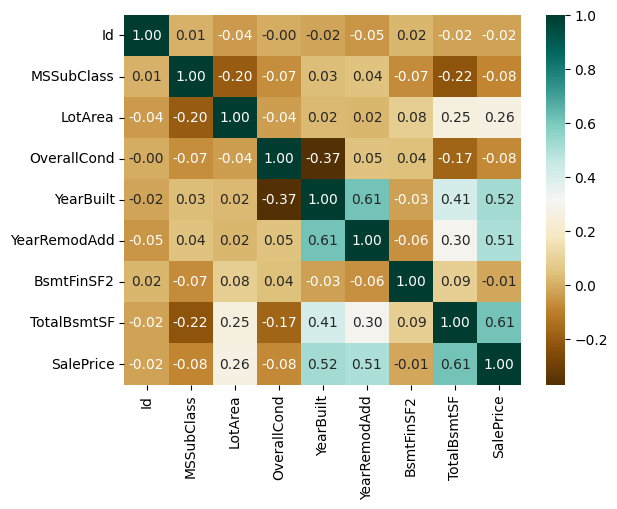

In [240]:
# lets use seaborn to indicate the above patterns and anomalies.
sns.heatmap(numerical_dataset.corr(),cmap = "BrBG",fmt = ".2f",
            annot= True)

Text(0, 0.5, 'No. of unique values')

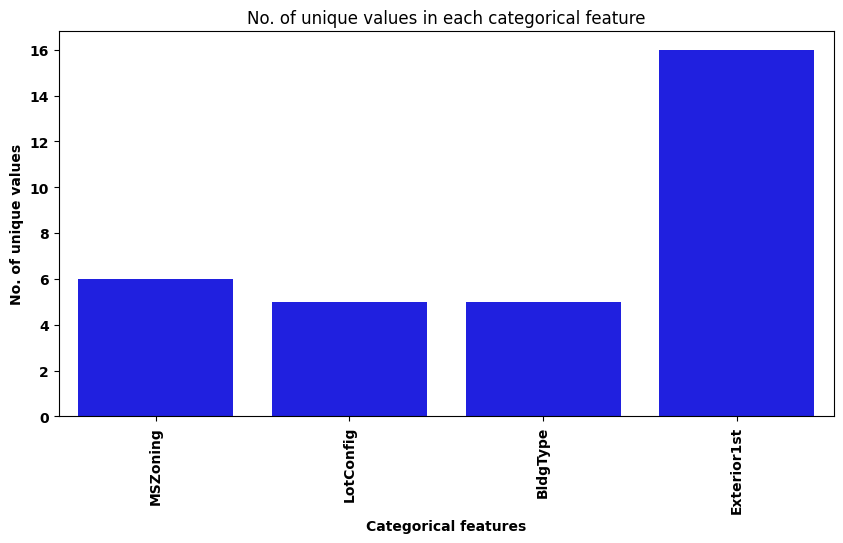

In [241]:
# using the bar graph to analysize the different categorical features.
unique_values = []
for col in obj_cols:
  unique_values.append(dataset[col].unique().size)
#print(unique_values)
plt.figure(figsize=(10,5))
plt.title("No. of unique values in each categorical feature")
plt.xticks(rotation=90,fontweight = "bold")
plt.yticks(fontweight = "bold")
sns.barplot(x = obj_cols,y=unique_values,color = "blue",)
plt.xlabel("Categorical features",fontweight = "bold")
plt.ylabel("No. of unique values",fontweight = "bold")

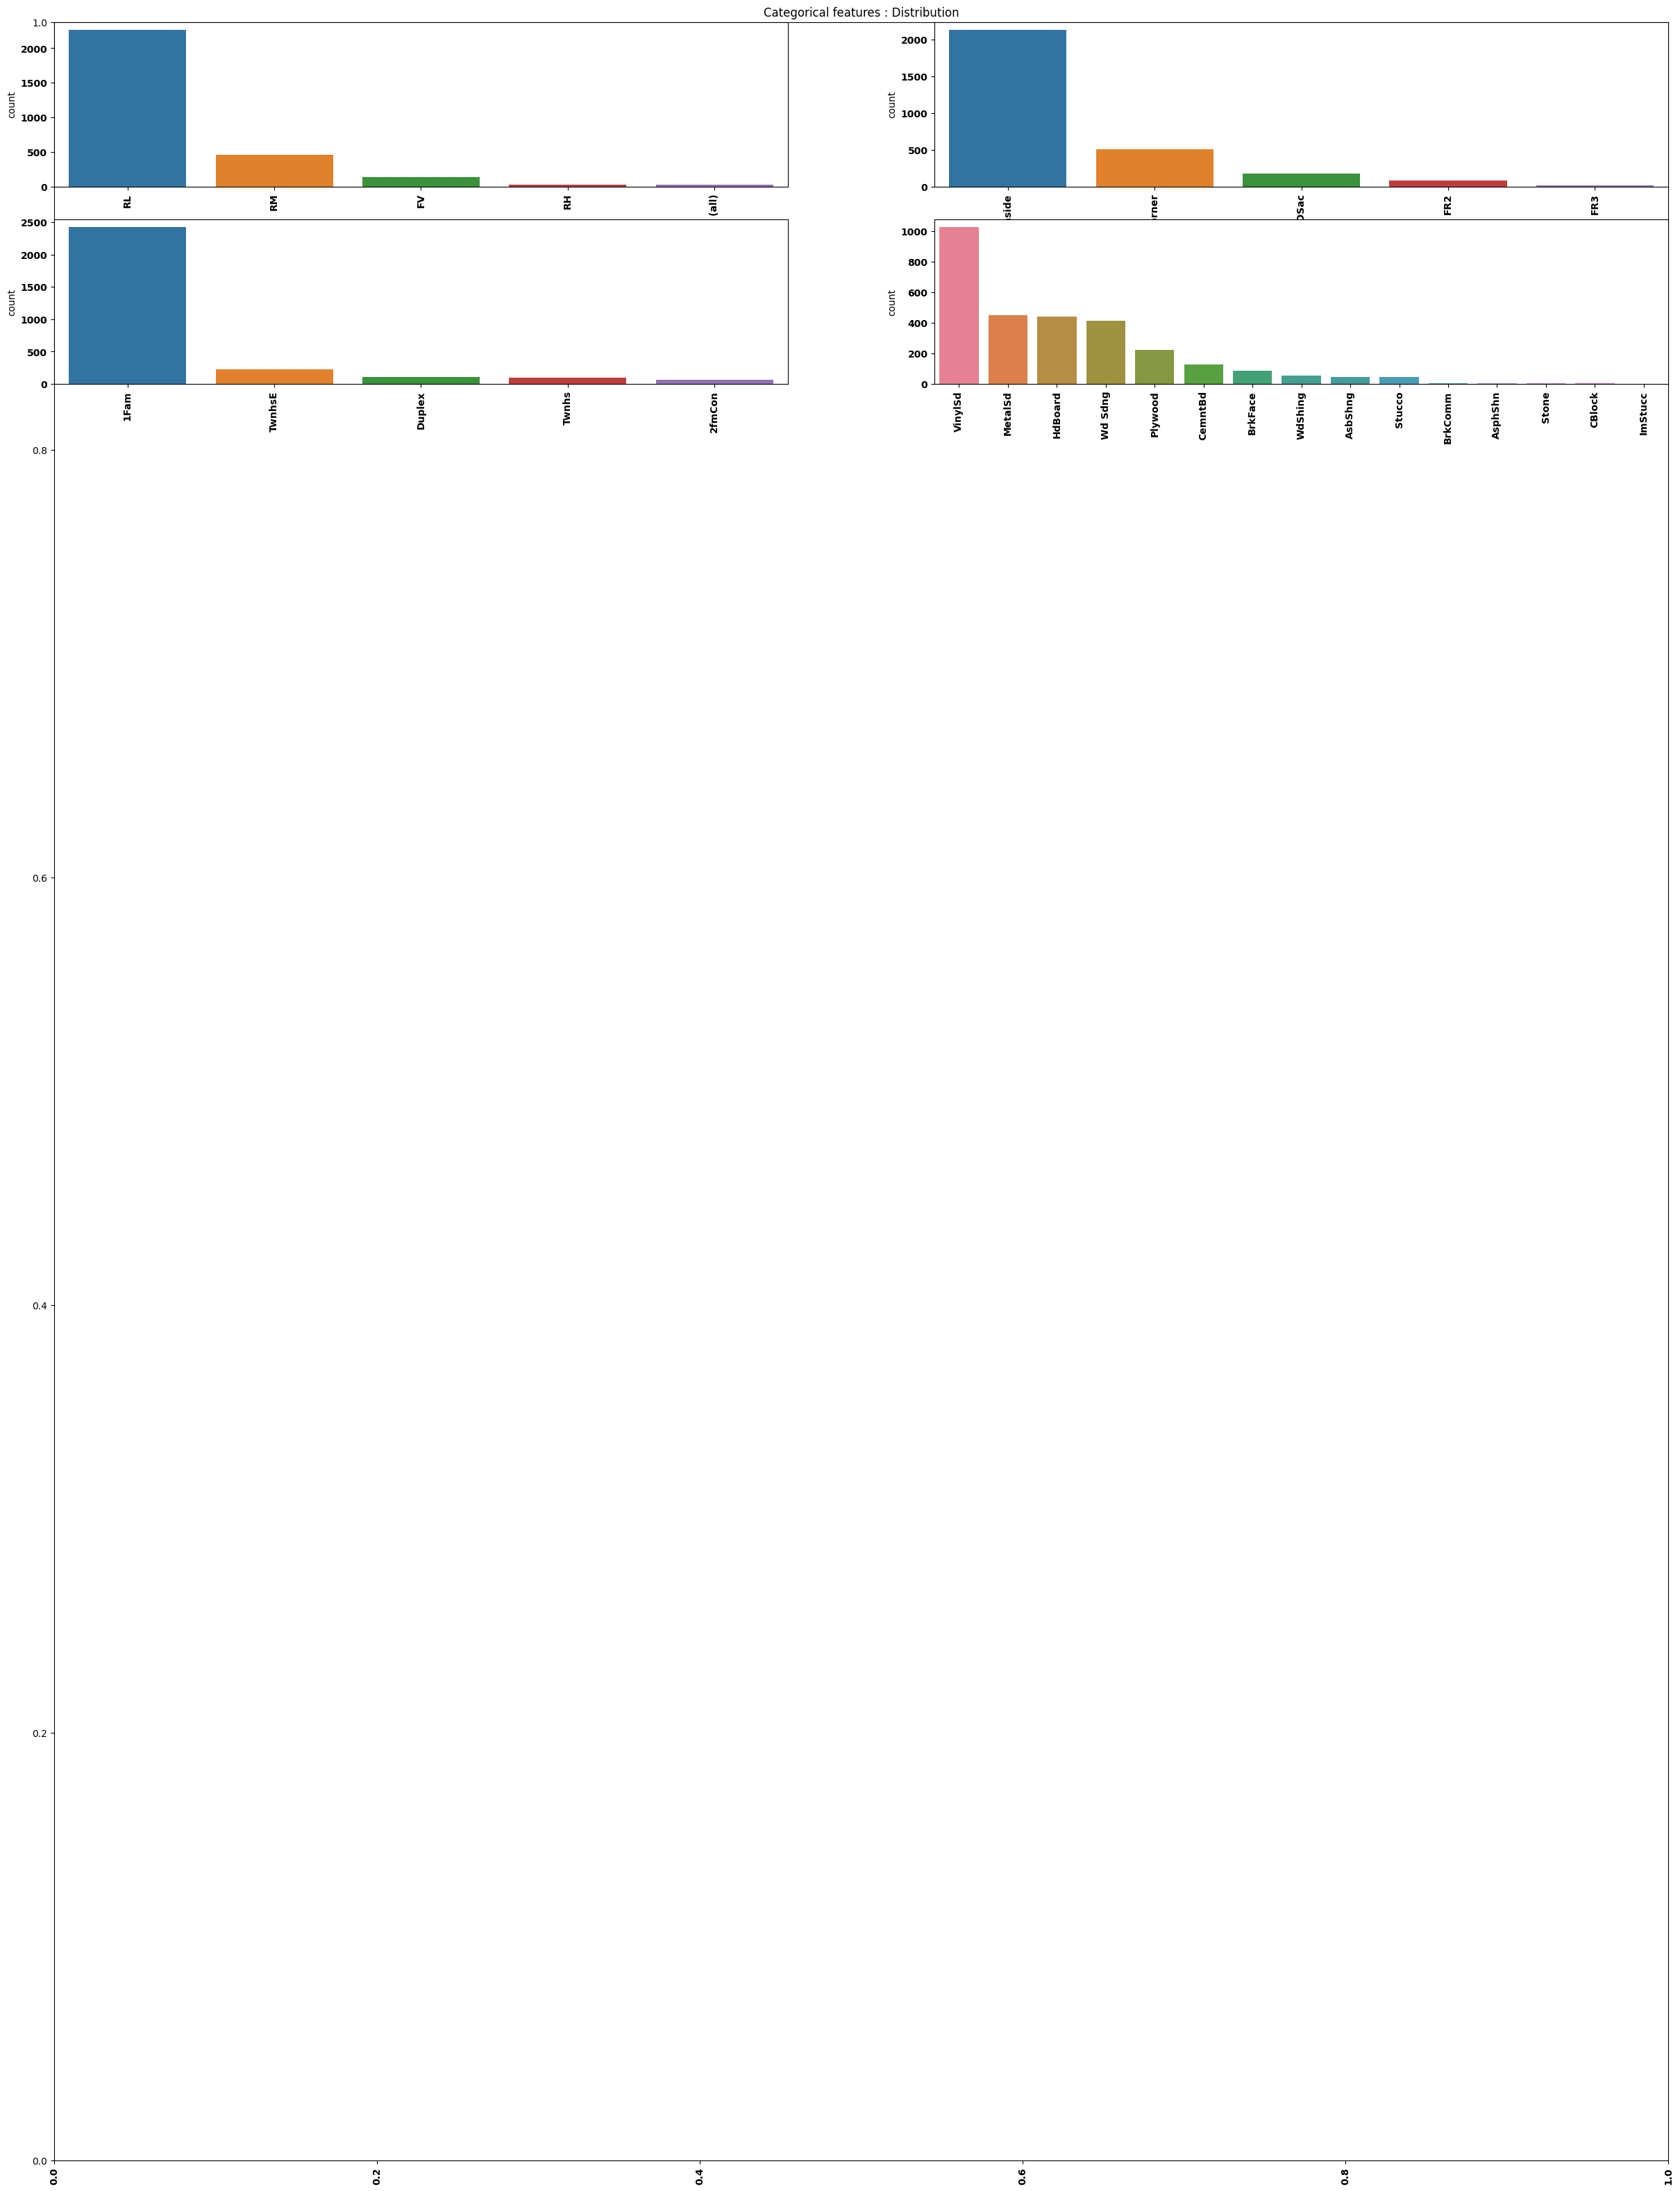

In [242]:
plt.figure(figsize=(30,40))
plt.title("Categorical features : Distribution")
plt.xticks(rotation =90,fontweight = "bold")
index = 1
for col in obj_cols:
  y = dataset[col].value_counts()
  plt.subplot(11,2,index)
  plt.xticks(rotation=90,fontweight = "bold")
  plt.yticks(fontweight = "bold")
  sns.barplot(x = list(y.index),y=y,hue = list(y.index))
  index+=1


__STEP 4:DATA CLEANING.__

In [243]:
# We dropping the id column as it unnecessarly required in our dataset.
dataset.drop(["Id"],axis=1,inplace= True)

In [244]:
dataset["SalePrice"] = dataset["SalePrice"].fillna(dataset["SalePrice"].mean())
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [245]:
# dropping null values
new_dataset = dataset.dropna()
new_dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [246]:
# checking of any remaining null values in the features
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


__STEP 5: ONE HOT ENCODER.__

In [247]:
# we are converting categoricl data into bibary vectors.
from sklearn.preprocessing import OneHotEncoder
s = new_dataset.dtypes =="object"
obj_cols = list(s[s].index)
print("Categorical variables:",obj_cols)
print("No.of categorical features:",len(obj_cols))

Categorical variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No.of categorical features: 4


In [248]:
#Lets apply the one hot encoder to the whole list
OH_encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(obj_cols)
df_final = new_dataset.drop(obj_cols,axis=1)
df_final = pd.concat([df_final,OH_cols],axis=1)
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


__STEP 6: SPLITTING DATASET INTO TRAINING AND TESTING.__

In [249]:
#X and y splitting where the X represents other features and y is the saleprice
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X= df_final.drop("SalePrice",axis=1)
y = df_final["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


__STEP 7 : MODEL TRAINING AND ACCURACY__
* Using Support vector machines
* Using Random forest
* Using Linear regression  



In [250]:
# We will be using the support vector machines to train our model
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_svm = SVR()
model_svm.fit(X_train_scaled,y_train)
y_pred = model_svm.predict(X_test_scaled)
print("Mean absolute percentage error:",
      f"{mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")

Mean absolute percentage error: 16.75%


In [251]:
# Now will be using Randomforest
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,y_train)
y_pred =model_RFR.predict(X_test)
print("Mean absolute percentage error:",
      f"{mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")

Mean absolute percentage error: 18.70%


In [252]:
#Using linear regression
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)
print("Mean absolute percentage error:",
      f"{mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")

Mean absolute percentage error: 18.83%
